**Case Study: Five Personality Traits**
Big Five Personality Traits, also known as the five-factor model (FFM) and the OCEAN model, is gor grouping different personality traits.

This theory uses descriptors of common language and suggest five broad dimensions commonly used to describe the juman personality and psyche. The theory identifies five factors:
- Openness to experience (inventive/curious versus consistent/cautious)
- Conscientiousness (efficient/organized versus easy-going/careless)
- Extroversion (friendly/compassionate versus challenging/detached)
- Neurotiscim (sensitive/nervous versus secure/confident)
-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/data-final.csv', sep='\t')
data.head()

#codebook represents the description of the features

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EXT1,1013558.0,2.648067,1.264407e+00,0.0,1.0,3.0,4.0,5.000000e+00
EXT2,1013558.0,2.773115,1.323943e+00,0.0,2.0,3.0,4.0,5.000000e+00
EXT3,1013558.0,3.288349,1.215006e+00,0.0,2.0,3.0,4.0,5.000000e+00
EXT4,1013558.0,3.140595,1.237442e+00,0.0,2.0,3.0,4.0,5.000000e+00
EXT5,1013558.0,3.276960,1.277593e+00,0.0,2.0,3.0,4.0,5.000000e+00
...,...,...,...,...,...,...,...,...
screenh,1013275.0,826.261104,1.802490e+02,0.0,720.0,768.0,900.0,8.802000e+03
introelapse,1013275.0,959.074776,5.104005e+04,0.0,5.0,10.0,30.0,2.944307e+07
testelapse,1013558.0,675.423329,2.017864e+04,1.0,171.0,224.0,313.0,1.189272e+07
endelapse,1015341.0,2701.409845,1.483898e+06,1.0,9.0,13.0,18.0,1.493327e+09


In [5]:
data.isnull().sum() / data.shape[0] * 100

EXT1                     0.175606
EXT2                     0.175606
EXT3                     0.175606
EXT4                     0.175606
EXT5                     0.175606
                           ...   
endelapse                0.000000
IPC                      0.000000
country                  0.007584
lat_appx_lots_of_err     0.000000
long_appx_lots_of_err    0.000000
Length: 110, dtype: float64

In [6]:
data[data.duplicated()]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err


Visualization of the features and outlier verification

In [7]:
#for col in data.columns:
#    print(col)
#    print('Skew:', data[col].skew())
#    plt.figure(figsize=(15, 4))
#    plt.subplot(1, 2, 1)
#    data[col].hist(bins=15, grid=False)
#    plt.subplot(1, 2, 2)
#    sns.boxplot(x=data[col])
#    plt.ylabel('Count')
#    plt.show()

In [10]:
data= data.dropna()

In [11]:
data.isnull().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                0
IPC                      0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 110, dtype: int64

In [12]:
data['dateload'] = pd.to_datetime(data['dateload'])
data['dateload'] = data['dateload'].dt.date

data = data.drop(['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], axis=1)

In [13]:
data.dtypes

EXT1           float64
EXT2           float64
EXT3           float64
EXT4           float64
EXT5           float64
                ...   
screenh        float64
introelapse    float64
testelapse     float64
endelapse        int64
IPC              int64
Length: 106, dtype: object

In [14]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
0,1.069304,-1.339326,1.408792,-0.921798,1.348737,-1.143013,1.591371,-1.112304,0.769836,-1.958685,...,-0.005569,-0.008775,-0.007733,-0.002231,-0.680887,1.097351,-0.018621,-0.021698,-0.001818,-0.236880
1,0.278462,1.681865,-0.237187,0.694401,-0.216655,0.488559,-0.550954,1.246273,-1.458903,1.105867,...,-0.008508,-0.007795,-0.007491,-0.005257,0.376066,-0.323065,-0.018562,-0.024424,-0.001814,-0.236880
2,-0.512380,0.171269,0.585802,0.694401,-0.216655,-0.327227,-1.265062,-0.326112,-0.715990,1.105867,...,-0.009662,0.003305,-0.011004,-0.006368,0.386778,-0.323065,-0.018738,-0.024077,-0.001817,-0.236880
3,-0.512380,-0.584028,-1.060177,-0.113698,0.566041,-0.327227,-0.550954,0.460081,-1.458903,0.339729,...,-0.008053,-0.004686,-0.006598,-0.004718,1.375886,2.073887,-0.015155,-0.022441,-0.001817,-0.236880
4,0.278462,0.171269,-0.237187,-0.113698,1.348737,0.488559,0.163154,1.246273,0.026923,0.339729,...,-0.001447,-0.000400,0.011818,0.007489,0.386778,-0.323065,-0.018641,-0.017682,-0.001810,-0.211754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012045,1.069304,-0.584028,0.585802,-0.113698,0.566041,0.488559,0.163154,-0.326112,0.026923,-0.426409,...,-0.008463,-0.012921,-0.010335,-0.009308,1.375886,1.408067,-0.018738,-0.025366,-0.001815,-0.211754
1012046,1.069304,0.171269,0.585802,-0.113698,-0.216655,0.488559,0.877263,0.460081,0.026923,-0.426409,...,-0.006205,-0.016268,-0.007863,-0.008440,1.375886,1.408067,-0.018738,-0.027250,-0.001817,-0.236880
1012047,1.069304,-0.584028,0.585802,-0.113698,1.348737,-1.143013,0.877263,-1.112304,0.769836,0.339729,...,-0.008492,-0.010553,-0.008537,-0.009183,1.375886,1.408067,-0.018758,-0.026605,-0.001814,-0.111247
1012048,-0.512380,0.926567,-0.237187,0.694401,-0.999350,-0.327227,-1.265062,0.460081,-0.715990,0.339729,...,-0.007805,-0.009980,0.002014,-0.006375,1.375886,1.408067,-0.018680,-0.022788,-0.001816,-0.236880


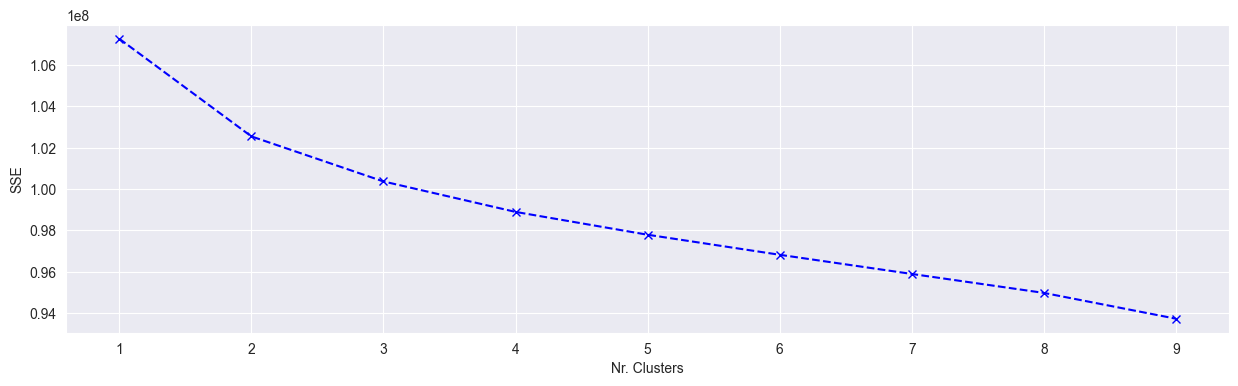

In [15]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(15, 4))
plt.plot(list(sse.keys()), list(sse.values()), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
sc = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

plt.figure(figsize=(15, 4))
plt.plot(list(sc.keys()), list(sc.values()), 'bx--')
plt.xlabel('Nr Clusters')
plt.ylabel('SC')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=, random_state=1).fit(data_scaled)
kmeans['Labels'] = kmeans.predict(data_scaled)
kmeans['Labels'].value_counts()

In [ ]:
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()

data_kmeans = pd.concat([mean, median], axis=0)
data_kmeans.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', ]